<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/05_AppliedMachineLearning/blob/main/06_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data clustering: Segmentation

In this course, we will learn how to perform customer segmentation using clustering algorithms. First, we will learn how to import and prepare our dataset, and then perform an efficient EDA. Then, we will use different clustering algorithms to cluster our customers. We will learn how to compare different models in order to define an adequate number of clusters. 

## Problem definition

We will work with a dataset from an e-commerce store. Here, we will have different entries for different customers. We want to use a marketing technique to impulsionate sales. However, how can we know which customers are more prone to buy in our store?

To know this, we will use an unsupervised learning technique: clustering. So, we have different information about the localization of the customers and sellers, value, hour, and others. Using clustering, we will be able to know which of our clients are more prone to buy products from our store!

## Importing libraries and datasets

Ok, now, let's import some very important libraries for our project:

In [71]:
# Data manipulation

import pandas as pd
import numpy as np
import datetime        # Manipulation of date format

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical operations

import math

And now, importing our dataset:

In [72]:
df = pd.read_csv('BancoDeDados.csv')

## Understanding our dataset

Now that we have imported our dataset for this project, let's understand it a little better. First, using the info( ) function:

In [73]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In this dataset we have 27 columns, each with different information about sales for different customers. Some important features we have here are: 

* Customer ID
* Customer location
* Seller ID
* Seller location
* Hour and status of the sale
* Price
* Type of payment
* Review
* Category
* And others. 

Let's take a look at these samples:


In [74]:
df.head( )

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


## Exploratory Data Analysis

Ok, so, let's do some preliminary data analysis. First, let's define a user defined function to plot a barplot for the percentual of the total of a given feature:

In [75]:
def plot_perc(feature, dataset):
  plt.figure(figsize = (16, 6))
  g = sns.countplot(x = feature, data = dataset, orient = 'h')

  g.set_ylabel('Count', fontsize = 18)

  sizes = []
  for p in g.patches:
    height = p.get_height( )
    sizes.append(height)
    g.text(p.get_x( ) + p.get_width( )/1.6, 
           height + 200, 
           '{:1.2f}%'.format(height/len(df)*100),
           ha = 'center', va = 'bottom', fontsize = 12)
    
  g.set_ylim(0, max(sizes)*1.1)

Nice! This function plot the count plot for a given feature and show the percentual of the total of each tag. So, let's do an example for the customer state:

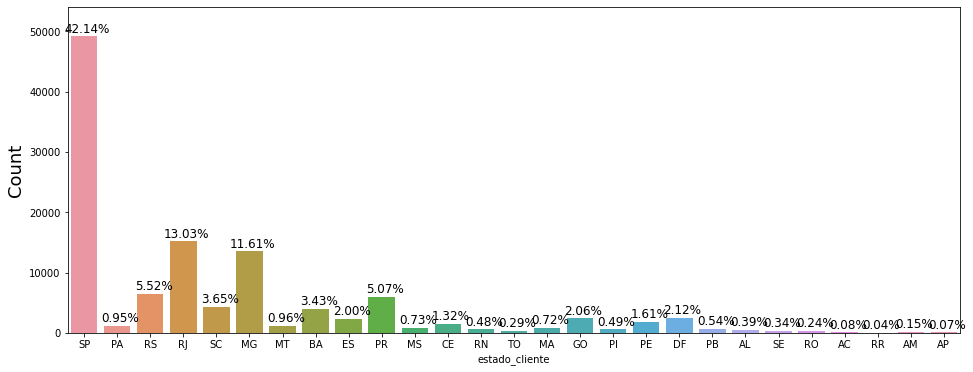

In [76]:
plot_perc('estado_cliente', df)

So, most of our customers are from SP (São Paulo). Now, let's see if this distribution is similar for the sellers.

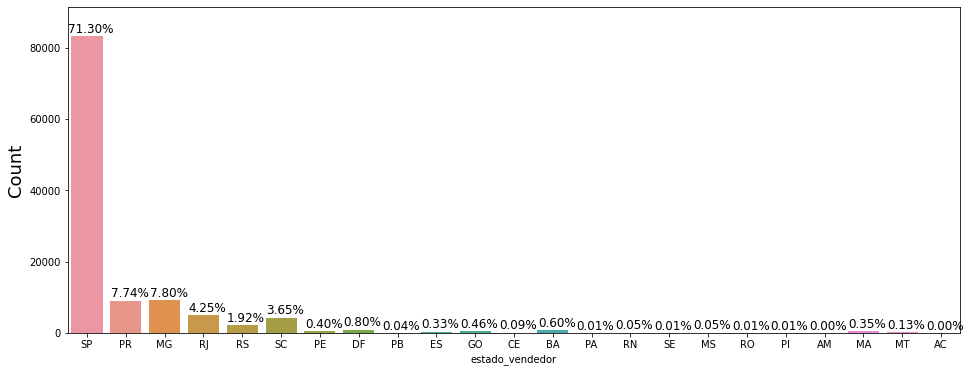

In [77]:
plot_perc('estado_vendedor', df)

Again, most of our sellers are from São Paulo. However, if we look at the other states, we see that there are far less sellers (when in comparison with the number of customers). A nice approach would be to favor new sellers from different states, so that the costs for the final customer is lowered.

And how do these customers pay for their transactions?

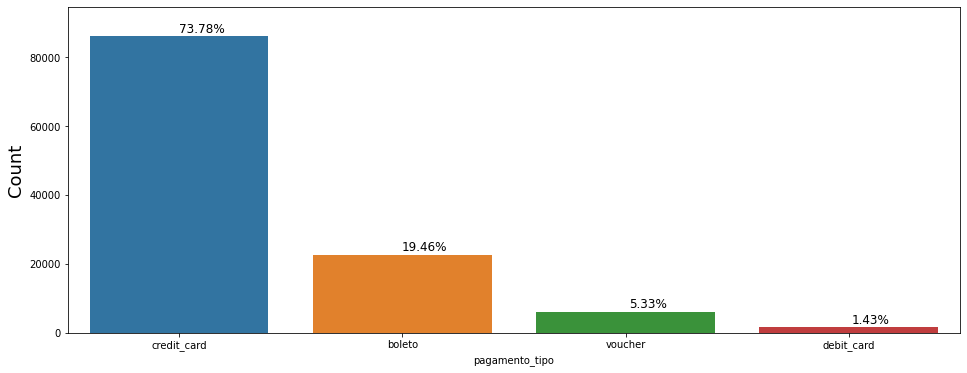

In [78]:
plot_perc('pagamento_tipo', df)

Most of our customers use credit cards, followed by those who use bank slips. A very low number of customers use vouchers or debit cards. 

We can also analyze the freight values by the customer state using a barplot:

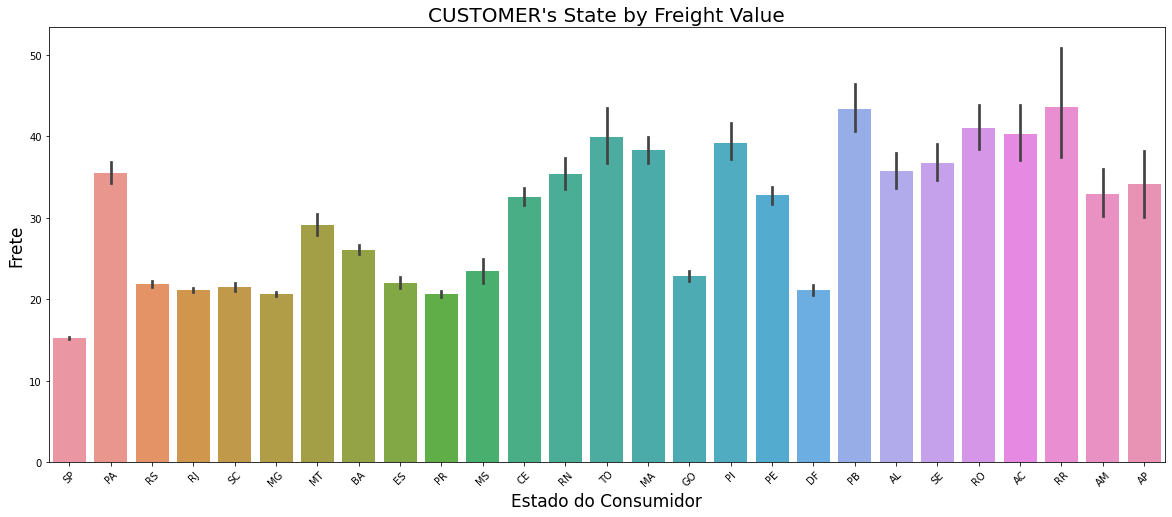

In [79]:
plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='frete',
                 data=df[df['preco'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("Estado do Consumidor", fontsize=17)
g3.set_ylabel("Frete", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45);

Note that states such as SP and RJ, which had more sellers, indeed have lower freight values.

Let's see how the freight values change for different regions, depending on where the seller is located:

In [80]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.022231,58.371935,27.532778,27.076867,19.654101
ES,36.895833,60.022857,38.183269,39.894510,28.753852
GO,14.573721,26.595909,33.369841,30.426667,23.764630
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.980406,41.923133,34.144730,28.976495,21.278114


We see that states such as SP and RJ, which are closer to the sellers, have very low freight values, while others such as CE, PB and RO have very high freight values!

# How to use clustering for digital marketing applications?

For segementation of our customers, we will use the RFM model (Recency, Frequency, Monetary):

*   Recency: Did the customer bought recently?
*   Frequency: Does the customers buys frequently?
*   Monetary: How much did the customer spent?

Ok, so, let's use our dataset to understand about recency, frequency, and monetary. First, let's filter our dataset:



In [81]:
df_temp = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

## Recency

To work with recency, we should understand if the customer has made any purchase recently. Let's get the time for the customer let's buy (which has important information about recency):

In [82]:
df_last_buy = df.groupby('id_unico_cliente').horario_pedido.max( ).reset_index( )
df_last_buy.columns = ['id_unico_cliente', 'date_max_buy']
df_last_buy.date_max_buy = pd.to_datetime(df_last_buy.date_max_buy)
df_last_buy

,id_unico_cliente,date_max_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


Now, we can check recency by evaluating how many days have passed since the last customer buy. So, we can do:

In [83]:
df_last_buy['Recency'] = (df_last_buy.date_max_buy.max( ) - df_last_buy.date_max_buy).dt.days
df_last_buy

,id_unico_cliente,date_max_buy,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


Nice! Now, let's join our two dataframes:

In [84]:
df_temp_2 = pd.merge(df_last_buy, df_temp, on = 'id_unico_cliente', how = 'left')
df_temp_2.head( )

,id_unico_cliente,date_max_buy,Recency,id_cliente,horario_pedido,item_id,preco
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,9b3932a6253894a02c1df9d19004239f,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,914991f0c02ef0843c0e7010c819d642,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,47227568b10f5f58a524a75507e6992c,2017-11-14 19:45:42,1,180.00


Nice! Now, let's cluster our dataset. And how can we do this?



### How can we cluster our data?

When we perform a cluster of our data, we are dividing it in $K$ groups based on their similarity. Here, however, we should define two things:

*   Which algorithm should we use?
*   How should we define the number of clusters $K$?

Regarding the algorithm, we will use a very basic and popular clustering algorithm, $K$-means. More about $K$-means can be found in:

https://en.wikipedia.org/wiki/K-means_clustering

The number of clusters should be defined based on the total inertia and the fear of overfitting. The total inertia is the sum of the distance between each data point and the cluster center. As we increase the number of clusters, this total inertia always decreases. However, if we use too many clusters, it is hard for us to interpret our results, and our model becomes more prone to overfitting. Also, our model becomes harder to fit.


### Clustering our data

Ok, so, let's try to cluster our data. Here, we will test 10 different numbers of clusters. Let's create an user-defined function to help us with this task:

In [85]:
def calc_wcss(data):
  wcss = []
  for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = data)
    data['Clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)
  return wcss

Nice! The WCSS (Within-Cluster Sum of Squares) is the total inertia. Here, we will evaluate the total inertia for 10 different $K$, varying from 1 to 10. Now, let's fit our models:

In [86]:
from sklearn.cluster import KMeans

df_recency = df_temp_2[['Recency']].copy( )

sum_squares = calc_wcss(df_recency)

Nice! Now, let's try to plot a graph for our WCSS:

Text(0.5, 0, '$K$')

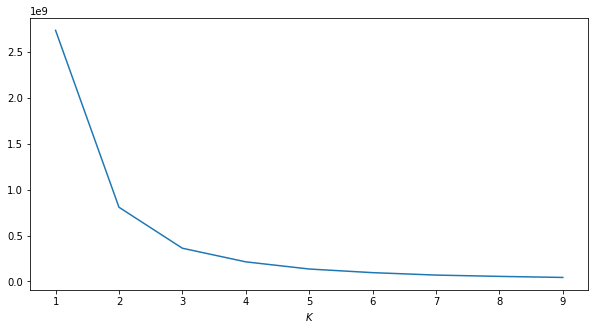

In [87]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10), sum_squares)

plt.xlabel('$K$')

Nice! To choose the number of clusters, we can use the "elbow rule", and choose a number of clusters where the decrease in WCSS with the increase of $K$ starts to become very minor. Thinking about this, we can choose $K = 4$ as a good initial guess. Is there any formal way to choose this number $K$?

### Choosing the number of clusters 

So, in our graph, we have 9 $a_i = (x_i, y_i)$ points.
We can choose the number of clusters by maximizing the following equation:

\begin{equation}
d(a_1, a_n, a_i) = \dfrac{|(y_n - y_1) \, x_i - (x_n - x_1) \, y_i + x_n \, y_1 + y_n \, x_1|}{\sqrt{(y_n - y_1)^2 + (x_n - x_1)^2}}
\end{equation}

where $a_1$ is related to the first point, $a_n$ is related to the final point, and $a_i$ is related to the $i$-th point. Point $i$ which shows the higher $d$ is chosen as the number of clusters. So, let's do it:

In [88]:
def dist_cluster(a1, an, ai):
  x1, y1 = a1
  xn, yn = an
  xi, yi = ai

  num = abs( (yn - y1)*xi - (xn - x1)*yi + xn*y1 + yn*x1 )
  den = np.sqrt( (yn - y1)**2 + (xn - x1)**2 )
  d = num/den

  return d

In [89]:
x = list(range(1, 10))
y = sum_squares

d_list = []

a1 = (x[0], y[0])
an = (x[-1], y[-1])

for i in range(9):
  ai = (x[i], y[i])
  d = dist_cluster(a1, an, ai)
  d_list.append(d)
  print(ai)
  print(d)

(1, 2733029504.9431906)
0.03280508858732398
(2, 807902990.2831879)
4.760378783781039
(3, 362034627.5187992)
5.0869118124632715
(4, 213827452.2636186)
4.527852972416313
(5, 135834986.05394346)
3.7598936172695754
(6, 96302367.25328957)
2.8775097769455726
(7, 69853717.8500375)
1.9561989370822606
(8, 55659275.42323936)
0.9984297798048396
(9, 44105200.01390536)
0.03280508858732398


Now, let's make a graph for d_list:

Text(0.5, 0, '$K$')

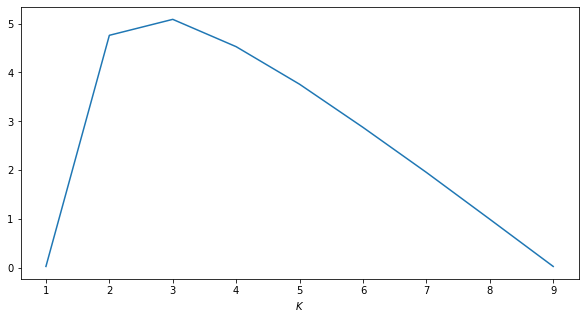

In [90]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10), d_list)

plt.xlabel('$K$')

So, the point that maximized d_list was for $K = 3$. So, we can choose $K = 3$ for our model! We can get this directly using:

In [91]:
K_opt = d_list.index(max(d_list)) + 1
K_opt

3

### Clustering recency

Ok, now, let's cluster recency using 3 clusters! 

In [92]:
kmeans3 = KMeans(n_clusters = 3)
df_temp_2['RecCluster'] = kmeans3.fit_predict(df_recency)

In [93]:
df_temp_2.head( )

,id_unico_cliente,date_max_buy,Recency,id_cliente,horario_pedido,item_id,preco,RecCluster
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27,1,129.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27,1,18.90,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,9b3932a6253894a02c1df9d19004239f,2017-03-10 21:05:03,1,69.00,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,914991f0c02ef0843c0e7010c819d642,2017-10-12 20:29:41,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,47227568b10f5f58a524a75507e6992c,2017-11-14 19:45:42,1,180.00,1


Nice! Now, we have clustered our users based on their recency. Now, we can group our dataset based on their cluster, and get some descriptive statistics for each cluster!

In [94]:
df_cluster_rec = df_temp_2.groupby('RecCluster').Recency.mean( ).reset_index( )

In [95]:
df_cluster_rec

,RecCluster,Recency
0,0,92.105064
1,1,260.761267
2,2,463.528154


So, in our cluster 0, we have an average 91 days of recency, 1 we have 462 days, and 2 we have 259. Let's organize this better, so that our clusters are ordered:

In [96]:
df_cluster_rec_ord = df_cluster_rec.sort_values(by = 'Recency', ascending = False).reset_index( drop = True )

In [97]:
df_cluster_rec_ord

,RecCluster,Recency
0,2,463.528154
1,1,260.761267
2,0,92.105064


So, our cluster 0 should be last, then 2, then 1. So, in fact, our clusters should be denominated by the **indexes of the ordered df**:

In [98]:
df_cluster_rec_ord['index'] = df_cluster_rec_ord.index
df_cluster_rec_ord

,RecCluster,Recency,index
0,2,463.528154,0
1,1,260.761267,1
2,0,92.105064,2


So, let's update our initial df, adding this index information:

In [99]:
df_temp_3 = pd.merge(df_temp_2, df_cluster_rec_ord[['RecCluster', 'index']], on = 'RecCluster')
df_temp_3.sample(5)

,id_unico_cliente,date_max_buy,Recency,id_cliente,horario_pedido,item_id,preco,RecCluster,index
36994,d12f0a2b169c77088b0cbad420f466b5,2018-03-12 00:06:54,175,66f5f0c5a0240902a45b2a6fa8302fd2,2018-03-12 00:06:54,1,59.90,0,2
86948,5461338ea772177374bcf3f23665178f,2017-10-23 19:51:15,314,666757864a60a4cb22fc360c7078612e,2017-08-10 20:08:15,1,59.90,1,1
61641,99c9cd802ed7712af954de561997105d,2017-08-27 10:21:32,371,8c638ad656b786e7a8550ab28c3ad4b2,2017-08-27 10:21:32,1,36.80,2,0
38046,d710ad04396d290564a7206e4c703b45,2018-04-20 12:26:34,135,8959f0ac02b89693bdaff818e5a09176,2018-04-20 12:26:34,1,299.99,0,2
103962,b5a5f413d1debecd51fd0e4874c03bbb,2017-12-02 22:02:19,274,347d2d46e041e08671c945edaa69b28a,2017-12-02 22:02:19,2,74.00,1,1


Nice! Now let's keep only the index column, and let's rename it:

In [100]:
df_temp_3.drop('RecCluster', axis = 1, inplace = True)
df_temp_3.rename(columns = {'index' : 'RecCluster'}, inplace = True)

In [101]:
df_temp_3[['Recency', 'RecCluster']].sample(10)

,Recency,RecCluster
99006,269,1
97575,192,1
59277,493,0
99671,196,1
49284,478,0
59509,424,0
56926,399,0
11844,152,2
54195,431,0
32419,147,2


Nice! So, for cluster 0, we have the lower recency, and for cluster 2, we have the highest recency.

We will have to do a similar procedure for all factors of the RFM approach. So, let's create a user-defined function:

In [102]:
def order_cluster(cluster_name, target_name, df_to_order, is_asc):
  df_cluster_rec = df_to_order.groupby(cluster_name)[target_name].mean( ).reset_index( )
  df_cluster_rec_ord = df_cluster_rec.sort_values(by = target_name, ascending = is_asc).reset_index( drop = True )
  df_cluster_rec_ord['index'] = df_cluster_rec_ord.index

  df_ordered = pd.merge(df_to_order, df_cluster_rec_ord[[cluster_name, 'index']], on = cluster_name)

  df_ordered.drop(cluster_name, axis = 1, inplace = True)
  df_ordered.rename(columns = {'index' : cluster_name}, inplace = True)

  return df_ordered

Nice! Let's try to apply this to order our initial dataset:

In [103]:
df_temp_3 = order_cluster('RecCluster', 'Recency', df_temp_2, False)

In [104]:
df_temp_3[['Recency', 'RecCluster']].sample(10)

,Recency,RecCluster
108250,282,1
74271,220,1
68001,444,0
110849,332,1
23430,59,2
72683,281,1
45694,475,0
82499,260,1
27660,68,2
110617,262,1


Nice! It seems to have worked out fine: lower recency are from cluster 2, higher recency are from cluster 0. We can also check this by using a describe:

In [105]:
df_temp_3.groupby('RecCluster')['Recency'].describe( )

,count,mean,std,min,25%,50%,75%,max
RecCluster,,,,,,,,
0,27261.0,463.528154,69.361796,363.0,405.0,456.0,514.0,728.0
1,44024.0,260.761267,51.897580,177.0,215.0,264.0,298.0,362.0
2,45296.0,92.105064,49.793578,0.0,45.0,93.0,135.0,176.0


## Frequency

Now, let's start clustering our other metrics. Now, let's try to cluster frequency. First, let's define a metric to characterize frequency in our dataset. For that end, we can count how many times a given customer had an approved buy:

In [106]:
df_frequency = df.groupby('id_unico_cliente').pedido_aprovado.count( ).reset_index( )
df_frequency.columns = ['id_unico_cliente', 'Frequency']
df_temp_4 = pd.merge(df_temp_3, df_frequency, on = 'id_unico_cliente')
df_temp_4.head( )

,id_unico_cliente,date_max_buy,Recency,id_cliente,horario_pedido,item_id,preco,RecCluster,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27,1,129.90,2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27,1,18.90,2,1
2,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,4a913a170c26e3c8052ed0202849b5a8,2018-04-05 19:33:16,1,154.00,2,1
3,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,135,d2509c13692836fc0449e88cf9eb4858,2018-04-20 12:57:23,1,27.99,2,1
4,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,174,c59e8ff99836e90d8b457d4122dc34e9,2018-03-12 15:22:12,1,104.90,2,1


Nice! Let's see a description of our new column:

In [107]:
df_temp_4.Frequency.describe( )

count    116581.000000
mean          1.822836
std           2.863176
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          75.000000
Name: Frequency, dtype: float64

So, our minimum value is 0, and our maximum value is 75. Now, let's cluster our frequency:

In [108]:
freq = df_temp_4.Frequency.copy( ).to_frame( )
kmeans3 = KMeans(n_clusters = 3)
df_temp_4['FreqCluster'] = kmeans3.fit_predict(freq)

So, let's describe our frequency based on the frequency cluster:

In [109]:
df_temp_4.groupby('FreqCluster')['Frequency'].describe( )

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,114750.0,1.570327,1.142482,0.0,1.0,1.0,2.0,8.0
1,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
2,1756.0,15.198178,6.870269,9.0,10.0,12.0,20.0,38.0


So, let's order our values once again. However, note that, here, we want higher cluster numbers for higher frequencies. So, we should now use:

In [110]:
df_temp_5 = order_cluster('FreqCluster', 'Frequency', df_temp_4, True)

In [111]:
df_temp_5.groupby('FreqCluster')['Frequency'].describe( )

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,114750.0,1.570327,1.142482,0.0,1.0,1.0,2.0,8.0
1,1756.0,15.198178,6.870269,9.0,10.0,12.0,20.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


Nice! Now, everything seems right. 

## Monetary

Now, let's go to the final metric, monetary. To get a moneraty metric, let's get the total value spent by each customer:

In [112]:
df_monetary = df.groupby('id_unico_cliente').pagamento_valor.sum( ).reset_index( )
df_monetary.columns = ['id_unico_cliente', 'Monetary']
df_temp_6 = pd.merge(df_temp_5, df_monetary, on = 'id_unico_cliente')
df_temp_6.head( )

,id_unico_cliente,date_max_buy,Recency,id_cliente,horario_pedido,item_id,preco,RecCluster,Frequency,FreqCluster,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27,1,129.90,2,1,0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27,1,18.90,2,1,0,27.19
2,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150,4a913a170c26e3c8052ed0202849b5a8,2018-04-05 19:33:16,1,154.00,2,1,0,166.98
3,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,135,d2509c13692836fc0449e88cf9eb4858,2018-04-20 12:57:23,1,27.99,2,1,0,35.38
4,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,174,c59e8ff99836e90d8b457d4122dc34e9,2018-03-12 15:22:12,1,104.90,2,1,0,129.76


Now, let's cluster based on monetary values:

In [113]:
mon = df_temp_6.Monetary.copy( ).to_frame( )
kmeans3 = KMeans(n_clusters = 3)
df_temp_6['MonCluster'] = kmeans3.fit_predict(mon)

Finally, let's order our clusters:

In [114]:
df_temp_7 = order_cluster('MonCluster', 'Monetary', df_temp_6, True)

In [115]:
df_temp_7.groupby('MonCluster')['Monetary'].describe( )

,count,mean,std,min,25%,50%,75%,max
MonCluster,,,,,,,,
0,115929.0,297.274827,540.591084,9.59,70.34,134.04,278.33,6323.04
1,598.0,12583.481555,6282.891746,6512.28,7708.80,9759.75,16313.60,30186.00
2,54.0,53324.380741,23712.512949,36489.24,44048.00,45256.00,45256.00,109312.64


Nice! Everything seems to have worked out. Our higher-numbered clusters have a higher mean monetary.

Before going further into the other topics, let's organize our dataframe columns:

In [116]:
df_customer = df_temp_7[['id_unico_cliente', 'Recency', 'RecCluster', 'Frequency', 'FreqCluster', 'Monetary', 'MonCluster']].copy( )

In [117]:
df_customer.head( )

,id_unico_cliente,Recency,RecCluster,Frequency,FreqCluster,Monetary,MonCluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,2,1,0,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,2,1,0,27.19,0
2,0004bd2a26a76fe21f786e4fbd80607f,150,2,1,0,166.98,0
3,00050ab1314c0e55a6ca13cf7181fecf,135,2,1,0,35.38,0
4,0005ef4cd20d2893f0d9fbd94d3c0d97,174,2,1,0,129.76,0


# Creating a grade system for the customers

Ok, we have defined (and ordered) the clusters for different customers and metrics. Now, let's define a methodology to perform customer segmentation. Let's create a grade system for these customers:

In [118]:
df_customer['Grade'] = df_customer.RecCluster + df_customer.FreqCluster + df_customer.MonCluster

In [119]:
df_customer.head( )

,id_unico_cliente,Recency,RecCluster,Frequency,FreqCluster,Monetary,MonCluster,Grade
0,0000366f3b9a7992bf8c76cfdf3221e2,115,2,1,0,141.90,0,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,2,1,0,27.19,0,2
2,0004bd2a26a76fe21f786e4fbd80607f,150,2,1,0,166.98,0,2
3,00050ab1314c0e55a6ca13cf7181fecf,135,2,1,0,35.38,0,2
4,0005ef4cd20d2893f0d9fbd94d3c0d97,174,2,1,0,129.76,0,2


Nice! Note that, since our clusters were all from 0 to 2, our grade goes from 0 to 6. Let's see the higher grade for our customers:

In [120]:
df_customer.Grade.max( )

4

Ok, so our maximum grade is 4! That means that no customer is present on the cluster 2 in all three metrics. 



Let's get the number of customers in each cluster:

In [125]:
df_customer.Grade.value_counts( ).to_frame( ).sort_index( ).rename(columns = {'Grade' : 'Count'})

,Count
0,26635
1,43792
2,45194
3,792
4,168


So, most of our customers are present on Grade 2, and very few are present on grades 3 or 4.

So, let's define some aspects for our customers to perform customer segmentation:

*   If their grade is 0, then we will name them "Innactive"
*   If their grade is 1, then they are open for "Business"
*   If their grade is 2, then they are from the "Master" segment
*   If their grade is more than 3, then they are 'Premium' customers.

In [126]:
df_customer['Segment'] = 'Innactive'
df_customer.loc[df_customer.Grade == 1, 'Segment'] = 'Business'
df_customer.loc[df_customer.Grade == 2, 'Segment'] = 'Master'
df_customer.loc[df_customer.Grade >= 3, 'Segment'] = 'Premium'

In [127]:
df_customer

,id_unico_cliente,Recency,RecCluster,Frequency,FreqCluster,Monetary,MonCluster,Grade,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,2,1,0,141.90,0,2,Master
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,2,1,0,27.19,0,2,Master
2,0004bd2a26a76fe21f786e4fbd80607f,150,2,1,0,166.98,0,2,Master
3,00050ab1314c0e55a6ca13cf7181fecf,135,2,1,0,35.38,0,2,Master
4,0005ef4cd20d2893f0d9fbd94d3c0d97,174,2,1,0,129.76,0,2,Master
...,...,...,...,...,...,...,...,...,...
116576,c402f431464c72e27330a67f7b94d4fb,192,1,20,1,44048.00,2,4,Premium
116577,c402f431464c72e27330a67f7b94d4fb,192,1,20,1,44048.00,2,4,Premium
116578,c402f431464c72e27330a67f7b94d4fb,192,1,20,1,44048.00,2,4,Premium
116579,c402f431464c72e27330a67f7b94d4fb,192,1,20,1,44048.00,2,4,Premium


Nice! Now, we have finished our RFM segmentation model. Let's save these information in a csv file, and let's start performing some visualization of our data.

In [128]:
df_customer.to_csv('RFM_customers.csv')

## Visualizing our features

First, let's see a count plot for our grades:

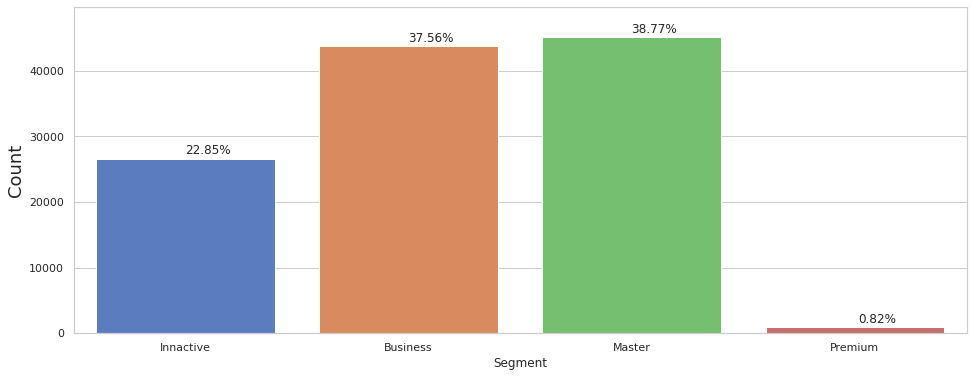

In [146]:
plot_perc('Segment', df_customer)

Here, we can visualize the value_counts( ) we performed earlier!

Ok, now, we are going to visualize our features using a scatter plot. First, let's create a user-defined function to plot our segmentation:

In [135]:
def plot_segment(x, y, data):
  sns.set(palette = 'muted', color_codes = 'True', style = 'whitegrid')
  plt.figure(figsize = (7, 5))
  sns.scatterplot(x = x, y = y, hue = 'Segment', data = data, size = 'Segment', sizes = (50, 150), size_order = ['Premium', 'Master', 'Business', 'Innactive'])

In [138]:
df_customer.sort_values(by = 'Grade', ascending = True, inplace = True)

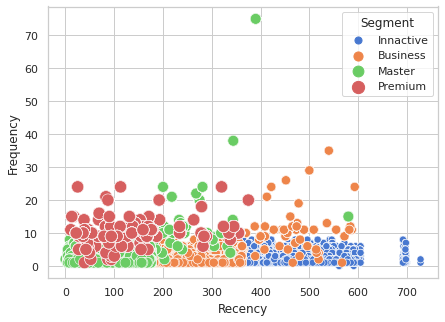

In [139]:
plot_segment('Recency', 'Frequency', df_customer)

Nice! Note that, here, we are not considering our monetary cluster yet. Most of our premium customers have very high recency, and pretty high frequency. Also, we have a 'Master' customer who had a VERY high frequency, but this customer does not buy from us anymore. It might be important to reactive our contact with him!

Also, most of our innactive customers do not buy from us anymore for a long time. Still, there are some 'Business' customers who used to buy from us a lot, but do not seem to buy anymore. 

Now, let's try to plot using 'Monetary':

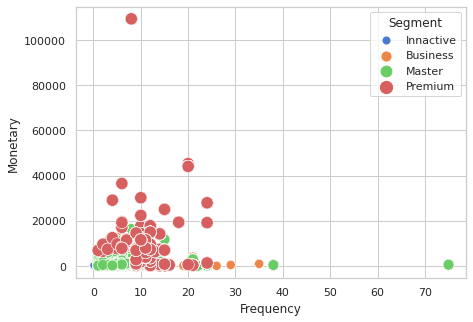

In [140]:
plot_segment('Frequency', 'Monetary', df_customer)

We see that, indeed, most of our customers who showed higher monetary values are from the 'Premium' cluster. If we analyze 'Monetary' with recency:

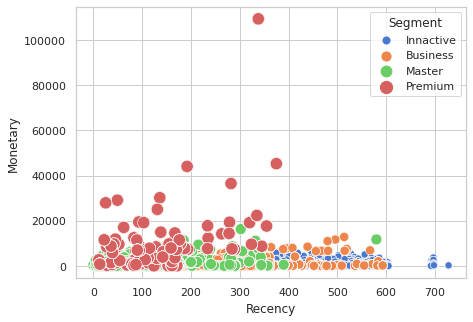

In [141]:
plot_segment('Recency', 'Monetary', df_customer)


Note that the customer who bought the most does not buy from us for some time. Actually, there are some customers who used to spent a lot of money on our store. We need to reactivate our contact with them.

# Creating other segments

Note that our grading system is very flexible. Instead of segmentating or customer based on grades, we can segmentate them based on how the clusters are related. For instance, we could create a segment 'Risk' for customers who bought a lot and very frequently, but are not buying from us for a long time, or a segment 'Faithful', for customers who buy a lot, in high frequencies, and have bought very recently. 

This segmentation allows us to define more focused approaches and methodologies for each type of customer. Some strategies could be related to:

*   Higher focus on customers satisfaction.
*   Make interactions more personal.
*   Build a community.
*   Offer instataneous rewards (for instance, sales for specific customers).
*   Fidelity program to raise frequency.
*   VIP program for customers who buy a lot.
*   Increase social media engagement.

